<a href="https://colab.research.google.com/github/yarathamed/Face-Recognition-System/blob/main/assignment1_pattern_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
# import  matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from skimage import color
from skimage import io
import cv2
from sklearn.model_selection import train_test_split
from collections import Counter

# plt.show()
# import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# datapath = 'drive/MyDrive/assignment1_pattern/faces/s1/2.pgm'
# try:
#   img=Image.open(datapath)
#   # img=cv2.imread(datapath)
#   plt.imshow(img)
#   print(np.asarray(img).shape)
# except IOError:
#   pass  
# # plt.show()

##Convert every image into a vector of 10304 values

In [ ]:
def conv_img_to_vec(path):  
  img  = Image.open(path)
  img_vec=np.array(img).flatten()
  return img_vec 
  

## Generating Data Matrix and label vector

In [ ]:
dataset_dir = "drive/MyDrive/assignment1_pattern/faces"
D = np.empty((0, 10304))#, int
y=[]
  
for i in range(40):
    label = i+1
    for j in range(10):
        
            path = dataset_dir + '/s'+str(label)+'/'+str(j+1)+'.pgm'
            img = conv_img_to_vec(path).astype(np.int64)
            D=np.append(D,np.array([img]),axis=0) 
            y.append(label)
        
print("Dimensions of D =",D.shape)
# print(D.shape[1])
print("Length of y =",len(y))

Dimensions of D = (400, 10304)
Length of y = 400


## Splitting the data into train and test data (50% each)

In [ ]:
X_train = D[1:400:2,:]
X_test = D[0:400:2,:]
y_train = y[1:400:2]
y_test = y[0:400:2]


print("train dataset: ",Counter(y_train))
print('test dataset: ',Counter(y_test))

print(X_train)
print(X_test)


train dataset:  Counter({1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 11: 5, 12: 5, 13: 5, 14: 5, 15: 5, 16: 5, 17: 5, 18: 5, 19: 5, 20: 5, 21: 5, 22: 5, 23: 5, 24: 5, 25: 5, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 5})
test dataset:  Counter({1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 11: 5, 12: 5, 13: 5, 14: 5, 15: 5, 16: 5, 17: 5, 18: 5, 19: 5, 20: 5, 21: 5, 22: 5, 23: 5, 24: 5, 25: 5, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 5})
[[ 60.  60.  62. ...  32.  34.  34.]
 [ 63.  53.  35. ...  41.  10.  24.]
 [ 43.  50.  41. ... 158. 153. 169.]
 ...
 [123. 121. 126. ...  40.  35.  42.]
 [125. 119. 124. ...  36.  39.  40.]
 [125. 124. 124. ...  36.  35.  34.]]
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 39.  44.  53. ...  29.  26.  29.]
 [ 64.  76.  80. ...  35.  37.  39.]
 ...
 [128. 125. 125. ...  85.  90.  84.]
 [129. 127. 133. ...  93. 

## Functions

In [ ]:
def KNN(x,y,x_test,y_test,alpha,i): ## classifier tuning
  K=[1,3,5,7]
  acc2=[]
  for k in K:
    knn_Model = KNeighborsClassifier(n_neighbors=k) 
    Nmodel=knn_Model.fit(x,y)
    y_pred=Nmodel.predict(x_test)
    acc2.append(accuracy_score(y_test, y_pred))
  plotAccAgainstK_Pca(K,acc2,alpha,i)

def FirstNN(x,y,x_test): ##first nearest neighbor to determine class labels
  firstnn_Model = KNeighborsClassifier(n_neighbors=1) 
  Nmodel=firstnn_Model.fit(x,y)
  y_pred=Nmodel.predict(x_test)
  return y_pred


def plotAccAgainstK_Pca(k,acc,alpha,i): ## plotting classification accuracy against value of k
  plot=plt.figure(i)
  plt.plot(k,acc)
  plt.xlabel("K")
  plt.ylabel("Accuracy")
  plt.title("Accuracy of alpha = "+str(alpha)+" against K")  


## PCA

In [ ]:
def pca(trainD,labels_trainD,alpha,testD,labels_testD):
  
  m=np.mean(trainD,axis=0)
  Z=trainD-m
  cov=(np.dot(Z.T,Z))/Z.shape[0]-1
  
  eigen_values , eigen_vectors = np.linalg.eigh(cov)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  print("dim of sorted eigenvectors = ",sorted_eigenvectors.shape)
  sum=0
  U=[]
  acc=[]
  for i in range(len(alpha)):
    
    sum=0
    for j in range(len(sorted_eigenvalue)):
      sum+=sorted_eigenvalue[j]
      if sum/np.sum(sorted_eigenvalue) >= alpha[i]:
        print("explained variance=",sum/np.sum(sorted_eigenvalue))
        print("value of alpha=",alpha[i])
        print("j =",j)
        U=sorted_eigenvectors[:,0:j+1]
        
        break
    U_arr=np.array(U)
    projected_Xtrain = np.dot(U_arr.T,trainD.T).T
    projected_Xtest = np.dot(U_arr.T,testD.T).T    
    

    print("dim of projected train data =",projected_Xtrain.shape)
    print("dim of projected test data =",projected_Xtest.shape)
    print("dim of projected U =",U_arr.shape)
  
    y_pred=FirstNN(projected_Xtrain,labels_trainD,projected_Xtest)
    KNN(projected_Xtrain,labels_trainD,projected_Xtest,labels_testD,alpha[i],i)

    acc.append(accuracy_score(labels_testD, y_pred))
  return acc   


dim of sorted eigenvectors =  (10304, 10304)
explained variance= 0.8028456944197028
value of alpha= 0.8
j = 36
dim of projected train data = (200, 37)
dim of projected test data = (200, 37)
dim of projected U = (10304, 37)
explained variance= 0.8522379926025135
value of alpha= 0.85
j = 52
dim of projected train data = (200, 53)
dim of projected test data = (200, 53)
dim of projected U = (10304, 53)
explained variance= 0.9007153349343628
value of alpha= 0.9
j = 76
dim of projected train data = (200, 77)
dim of projected test data = (200, 77)
dim of projected U = (10304, 77)
explained variance= 0.9500703732116361
value of alpha= 0.95
j = 115
dim of projected train data = (200, 116)
dim of projected test data = (200, 116)
dim of projected U = (10304, 116)
[0.93, 0.94, 0.945, 0.935]


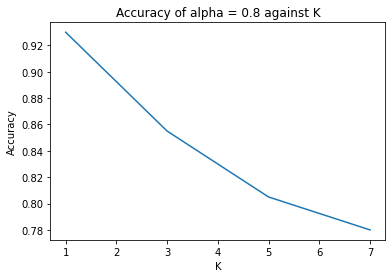

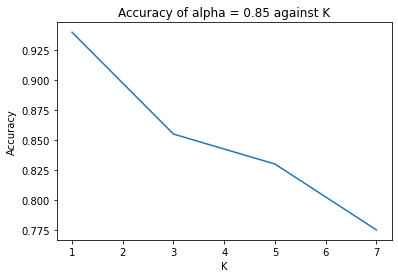

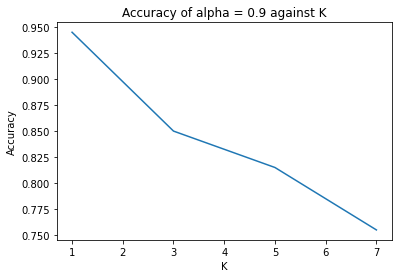

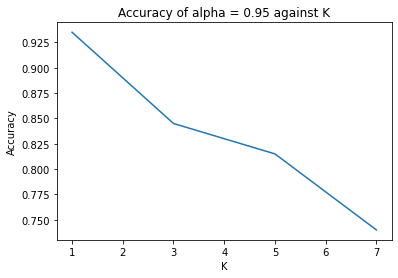

In [ ]:
alpha=[0.8,0.85,0.9,0.95]

acc=pca(X_train,y_train,alpha,X_test,y_test)

print(acc)


## plotting classification accuracy against value of alpha

Text(0, 0.5, 'Accuracy')

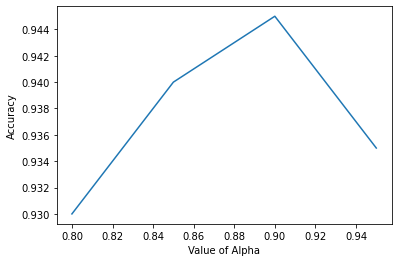

In [ ]:
plt.plot(alpha, acc)
plt.xlabel('Value of Alpha')
plt.ylabel('Accuracy')

In [ ]:
D2 = D
labels_D2=[0]*400
print(D2)

[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [125. 119. 124. ...  36.  39.  40.]
 [119. 120. 120. ...  89.  94.  85.]
 [125. 124. 124. ...  36.  35.  34.]]


dim of X_trainNF =  (250, 10304)
dim of sorted eigenvectors =  (10304, 10304)
explained variance= 0.8053400547729732
value of alpha= 0.8
j = 4
dim of projected train data = (250, 5)
dim of projected test data = (250, 5)
dim of projected U = (10304, 5)
explained variance= 0.8539547674403535
value of alpha= 0.85
j = 9
dim of projected train data = (250, 10)
dim of projected test data = (250, 10)
dim of projected U = (10304, 10)
explained variance= 0.9018890958243682
value of alpha= 0.9
j = 22
dim of projected train data = (250, 23)
dim of projected test data = (250, 23)
dim of projected U = (10304, 23)
explained variance= 0.9500389102649535
value of alpha= 0.95
j = 57
dim of projected train data = (250, 58)
dim of projected test data = (250, 58)
dim of projected U = (10304, 58)
[1.0, 1.0, 1.0, 1.0]
dim of X_trainNF =  (350, 10304)
dim of sorted eigenvectors =  (10304, 10304)
explained variance= 0.8158515719989489
value of alpha= 0.8
j = 0
dim of projected train data = (350, 1)
dim of pro

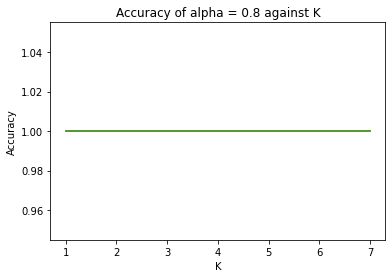

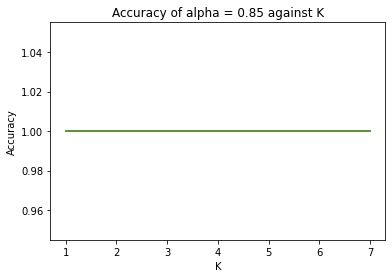

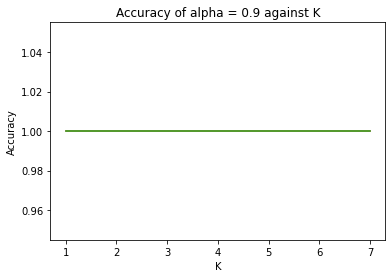

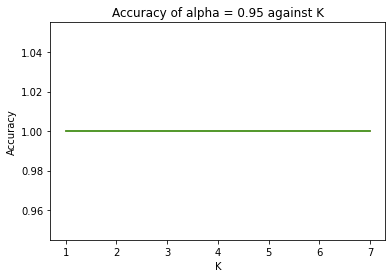

In [ ]:
step = [1, 3, 5]
accuracies=[]
for j in range(len(step)):
 if step[j]!=1:
  del labels_D2[400:]
  D2 = D2.tolist()
  del D2[400:]
 D2 = np.array(D2)
 for i in range(1, (step[j]*100)+1): 
  labels_D2.append(1) 
  path_ni = "drive/MyDrive/assignment1_pattern/nonfaces2/pic ("+str(i)+").jpg"
  img = io.imread(path_ni)
  imgGray = color.rgb2gray(img)
  imgGray_resized = cv2.resize(imgGray, (92,112))
  img_nf = np.array(imgGray_resized).flatten()
  D2=np.append(D2,np.array([img_nf]),axis=0)

#  np.random.shuffle(D2[400:])
 X_trainNF = D2[1:400+step[j]*100:2,:]
 X_testNF = D2[0:400+step[j]*100:2,:]
 y_trainNF = labels_D2[1:400+step[j]*100:2]
 y_testNF = labels_D2[0:400+step[j]*100:2]
 print("dim of X_trainNF = ",X_trainNF.shape)
 accNF=pca(X_trainNF,y_trainNF,alpha,X_testNF,y_testNF)
 print(accNF)
 accuracies.append(sum(accNF)/4)
  # D2 = D2.tolist()
#print(D2.shape)  
#print(len(labels_D2))
#print(np.asarray(imgGray_resized).shape)

Text(0, 0.5, 'Accuracy')

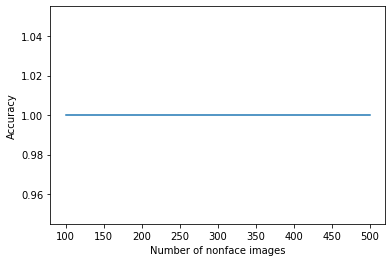

In [ ]:
plt.plot([100,300,500],accuracies)
plt.xlabel("Number of nonface images")
plt.ylabel("Accuracy")

In [ ]:
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(D, y, test_size=0.3, random_state=42,stratify=y)
print("train dataset: ",Counter(y_train_70))
print('test dataset: ',Counter(y_test_30))

train dataset:  Counter({16: 7, 4: 7, 11: 7, 12: 7, 27: 7, 25: 7, 2: 7, 19: 7, 20: 7, 13: 7, 6: 7, 36: 7, 31: 7, 8: 7, 5: 7, 28: 7, 1: 7, 30: 7, 38: 7, 7: 7, 9: 7, 35: 7, 23: 7, 32: 7, 39: 7, 26: 7, 29: 7, 24: 7, 21: 7, 10: 7, 3: 7, 37: 7, 40: 7, 17: 7, 34: 7, 14: 7, 15: 7, 33: 7, 18: 7, 22: 7})
test dataset:  Counter({31: 3, 19: 3, 17: 3, 10: 3, 18: 3, 25: 3, 38: 3, 37: 3, 1: 3, 36: 3, 26: 3, 39: 3, 23: 3, 27: 3, 15: 3, 8: 3, 33: 3, 35: 3, 22: 3, 9: 3, 12: 3, 28: 3, 34: 3, 16: 3, 4: 3, 29: 3, 30: 3, 5: 3, 14: 3, 20: 3, 6: 3, 7: 3, 32: 3, 11: 3, 2: 3, 21: 3, 24: 3, 40: 3, 13: 3, 3: 3})


dim of sorted eigenvectors =  (10304, 10304)
explained variance= 0.8024555503191347
value of alpha= 0.8
j = 39
dim of projected train data = (280, 40)
dim of projected test data = (120, 40)
dim of projected U = (10304, 40)
explained variance= 0.8505807181791769
value of alpha= 0.85
j = 58
dim of projected train data = (280, 59)
dim of projected test data = (120, 59)
dim of projected U = (10304, 59)
explained variance= 0.9011850088787
value of alpha= 0.9
j = 91
dim of projected train data = (280, 92)
dim of projected test data = (120, 92)
dim of projected U = (10304, 92)
explained variance= 0.9505817434059086
value of alpha= 0.95
j = 147
dim of projected train data = (280, 148)
dim of projected test data = (120, 148)
dim of projected U = (10304, 148)
[0.9583333333333334, 0.9416666666666667, 0.9583333333333334, 0.95]


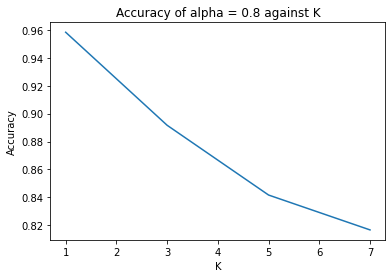

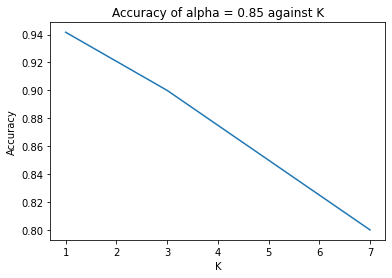

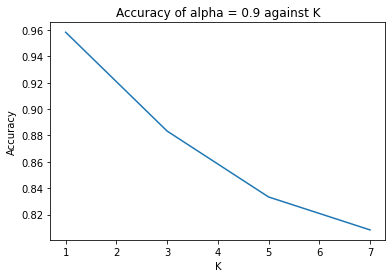

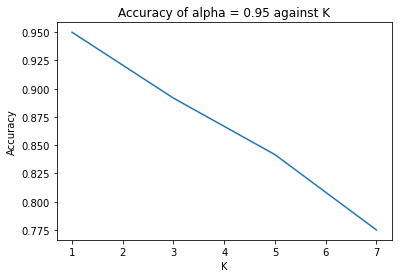

In [ ]:
acc=pca(X_train_70,y_train_70,alpha,X_test_30,y_test_30)
print(acc)